Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

In [35]:
import numpy as np
A = np.array([
	[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
	[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [36]:
D = np.diag(A.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [37]:
L = D-A
print(L)

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


In [38]:
vals, vecs = np.linalg.eig(A)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [40]:
X = pd.read_csv('heart.csv')

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [41]:
X.ffill(inplace=True)

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Exclude non-numeric columns or columns that should not be part of the transformation
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# Handling missing values
X_numeric = X_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_normalized = normalize(X_scaled)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

X_principal.head()

,P1,P2
0,0.114874,-0.598422
1,0.622393,-0.014715
2,0.732557,-0.071500
3,0.091724,-0.328820
4,0.479656,0.455192


In [43]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

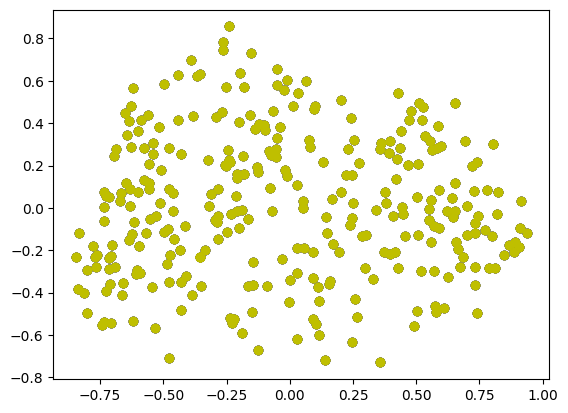

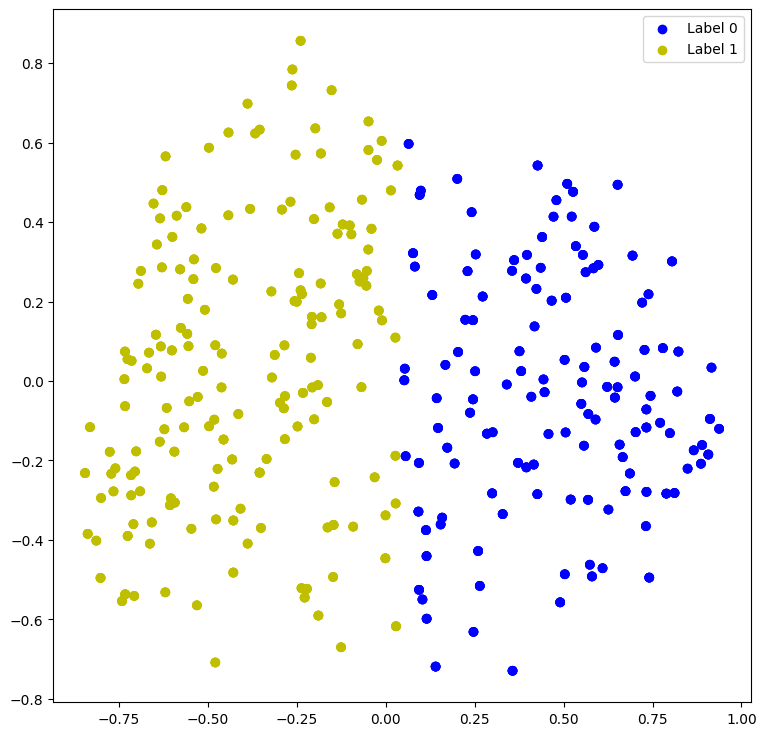

In [44]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
 
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
 
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [47]:
print("Features of the dataset:")
for feature in X.columns:
    print(feature)

Features of the dataset:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


# Conclusion

The spectral clustering results on the heart disease dataset, using principal components derived from age and cardiovascular features, reveal two distinct clusters. The clustering suggests potential patterns or subgroups within the data related to age and cardiac health indicators. Further analysis of the specific characteristics distinguishing these clusters can provide valuable insights into factors contributing to heart disease susceptibility.




# Without Using PCA

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


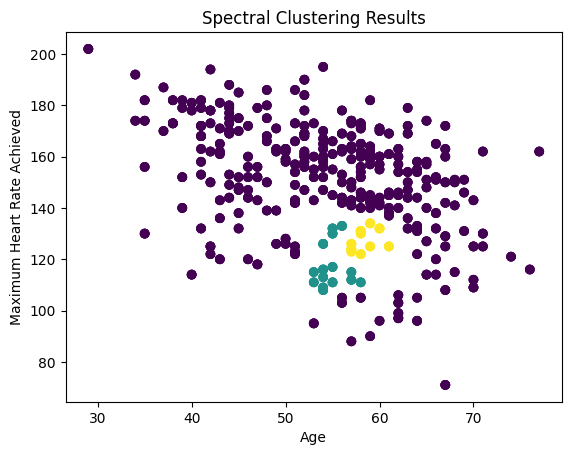

In [52]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "heart.csv"
data = pd.read_csv(dataset_path)

# Using the numeric columns 'age' and 'thalach'
X = data[['age', 'thalach']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform spectral clustering with nearest_neighbors affinity
n_clusters = 3  # Set the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42, n_neighbors=10)
clusters = spectral_clustering.fit_predict(X_scaled)

# Visualize the results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()


# Conclusion

The graph used for spectral embedding is not fully connected. Spectral clustering methods typically assume a fully connected graph to ensure accurate results. In my case, it might suggest that certain data points or observations in the dataset are not connected to others, potentially leading to suboptimal clustering.

Matplotlib is building the font cache; this may take a moment.


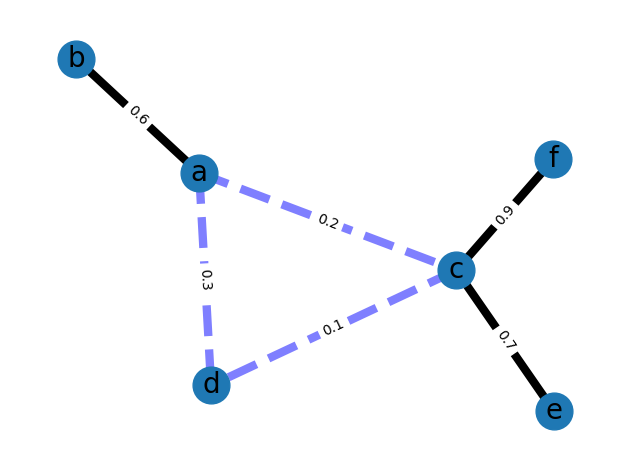

Node a: Eigenvector Centrality = 0.1975
Node b: Eigenvector Centrality = 0.1007
Node c: Eigenvector Centrality = 0.6960
Node d: Eigenvector Centrality = 0.1095
Node e: Eigenvector Centrality = 0.4139
Node f: Eigenvector Centrality = 0.5322


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Print the eigenvector centrality for each node
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")

<br>
Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

earthbound
EarthBound / MOTHER
Top Nodes by Eigenvector Centrality: [Redditor(name='itzaspace'), Redditor(name='birthdaylines'), Redditor(name='-jsm-'), Redditor(name='PressureIntrepid1069'), Redditor(name='imheavyproblem')]


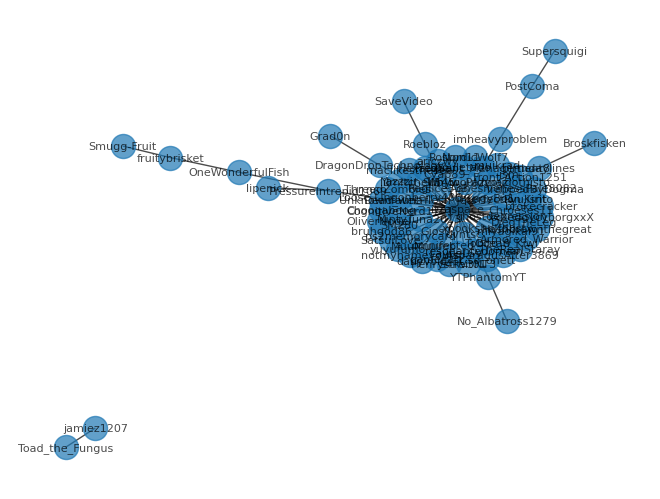

In [2]:
import praw
import networkx as nx
import matplotlib.pyplot as plt  
# Connect to Reddit API
reddit = praw.Reddit(
    client_id="JSuRGp3X0fOzmGIhlZP89w",
    client_secret="2dXt2Er8KfXbnOlvPktLzZiMJTGhVw",
    user_agent="discrete by Pleasant-Pause7071",
)

# Choose a subreddit
subreddit_name = "earthbound"
subreddit = reddit.subreddit(subreddit_name)
print(subreddit.display_name)  # Prints the subreddit's display name
print(subreddit.title)  # Prints the subreddit's title

# Get the top post from the subreddit
top_post = subreddit.top(limit=1).__next__()

# Use the post ID for social network analysis
post_id = top_post.id

# Function to create a social network graph from comments
def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Check if the comment is a MoreComments object
        if isinstance(comment, praw.models.MoreComments):
            continue  # Skip MoreComments objects
        # Check if the comment has a valid author
        if comment.author:
            parent_comment = comment.parent()
            # Check if the parent comment is a MoreComments object
            if isinstance(parent_comment, praw.models.MoreComments):
                continue  # Skip MoreComments objects
            # Check if the parent comment has a valid author
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G



# Perform social network analysis
social_network = create_social_network(post_id)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(social_network)

# Sort nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Print the top nodes
top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

pos = nx.spring_layout(social_network)  # Set layout algorithm
nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
plt.show()

# Hypothesis
Engaged participants in discussions within the Earthbound subreddit community on Reddit are anticipated to exhibit heightened eigenvector centrality. This increased centrality suggests a more pivotal role, showcasing strong connections with other influential users and contributing significantly to the overall vibrancy and interconnectivity of the community.
## Conclusion
Upon conducting a social network analysis of the Earthbound subreddit community, the results underscore the presence of specific users with elevated eigenvector centrality, underscoring their central importance within the community. The identified prominent nodes likely serve as key bridges, interacting with a diverse array of engaged users. This suggests their crucial role in uniting various members, thereby enhancing the community's cohesion and liveliness.


# Top Nodes by Eigenvector Centrality:

In [3]:
print(top_nodes)

[Redditor(name='itzaspace'), Redditor(name='birthdaylines'), Redditor(name='-jsm-'), Redditor(name='PressureIntrepid1069'), Redditor(name='imheavyproblem')]
